# 2、scikit-learn 中的多项式回归和 Pipeline

首先生成测试数据。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

模拟的函数关系式：
$$
y = 0.5 x^2 + x + 2
$$

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

## 使用 scikit-learn 生成多项式特征

本节要达到的目标是和我们上一节自己去使用矩阵的拼接方式生成多项式特征的线性回归的效果相同。

### 使用 scikit-learn 的预处理模块生成多项式特征

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

为什么会有 3 列呢，让我们看一看数据就知道了。

In [6]:
X[:5, :]

array([[-1.71333957],
       [-0.65276754],
       [ 2.62294847],
       [-2.37774645],
       [-0.64043632]])

In [7]:
X2[:5, :]

array([[ 1.        , -1.71333957,  2.93553248],
       [ 1.        , -0.65276754,  0.42610546],
       [ 1.        ,  2.62294847,  6.87985868],
       [ 1.        , -2.37774645,  5.65367816],
       [ 1.        , -0.64043632,  0.41015867]])

In [8]:
X2[:5, 1] ** 2

array([ 2.93553248,  0.42610546,  6.87985868,  5.65367816,  0.41015867])

可以看到：  
第 1 列，是特征的 0 次幂，均为 1。  
第 2 列，是特征的 1 次幂，均为特征本身。  
第 3 列，是特征的 2 次幂（平方）。  

### 接下来就可以使用线性的模型去拟合 X2 这组数据

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


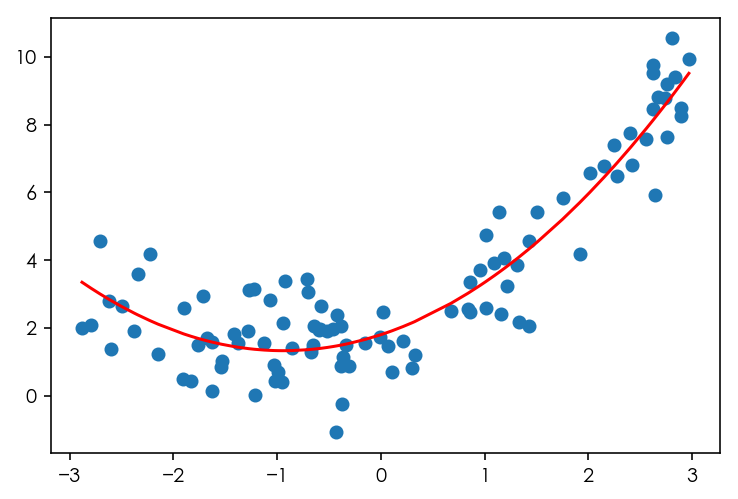

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [11]:
lin_reg2.coef_

array([ 0.        ,  1.00431711,  0.53448159])

In [12]:
lin_reg2.intercept_

1.8116499378192898

模拟的函数关系式：
$$
y = 0.5 x^2 + x + 2
$$

是吻合的。

### 关于 PolynomialFeatures

In [13]:
X = np.arange(1, 11).reshape(-1, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2

array([[   1.,    1.,    2.,    1.,    2.,    4.],
       [   1.,    3.,    4.,    9.,   12.,   16.],
       [   1.,    5.,    6.,   25.,   30.,   36.],
       [   1.,    7.,    8.,   49.,   56.,   64.],
       [   1.,    9.,   10.,   81.,   90.,  100.]])

In [17]:
X2.shape

(5, 6)

#### degree 为什么会有 6 个特征呢？

这 6 个特征的组合是：  
1、0 次幂（所有的数值都等于 1），  
2、特征1，  
3、特征2，  
4、特征1的平方，  
5、特征1 * 特征2，  
6、特征2的平方。

## Pipeline

这一节要注意，使用了多项式回归以后，高次的特征（数值上）可能会比低次的特征（数值上）多很多，所以，我们有必要将所有的特征进行归一化。所以，我们整个的训练过程可以分为以下三个步骤：
1. 使用多项式构造特征，使用 PolynomialFeatures 类的实例；
2. 使用均值、标准差归一化，使用 StandardScaler 类的实例；
3. 使用线性回归拟合数据，使用 LinearRegression 的实例。

定义这样三个程式化的步骤，可以使用 Pipeline 来定义。

In [18]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [19]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

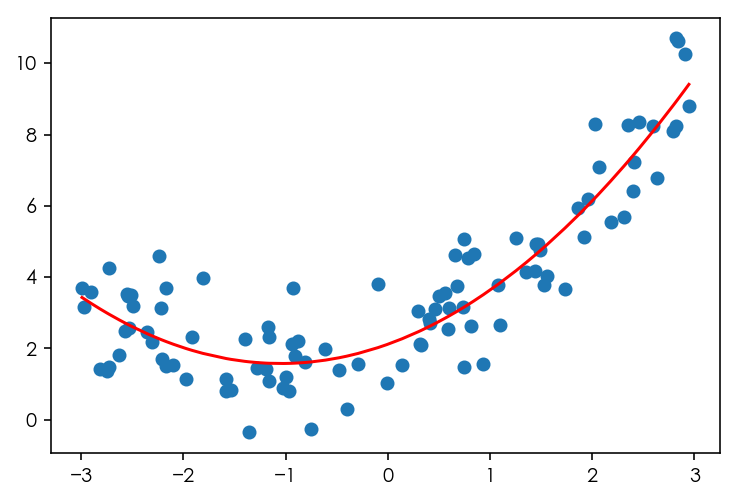

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')
plt.show()